In [19]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import sklearn
import pytesseract
import cv2
from pytesseract import Output
import re
import matplotlib.pyplot as plt

In [20]:
len(os.listdir('/home/user/Desktop/HELMET AND NUMBER PLATE DETECTION/Helmet data'))

2

In [21]:
from posix import listdir
catpath = os.path.join('/home/user/Desktop/HELMET AND NUMBER PLATE DETECTION/Helmet data','Helmet')
for img in  os.listdir(catpath):
  print(img)

Screenshot from 2023-01-24 11-44-22 (another copy).png
data (another copy).jpg
data.jpg
Screenshot from 2023-01-24 11-44-22 (12th copy).png
Screenshot from 2023-01-24 11-44-22 (15th copy).png
data (8th copy).jpg
data (4th copy).jpg
Screenshot from 2023-01-24 11-44-22.png
Screenshot from 2023-01-24 11-44-22 (5th copy).png
Screenshot from 2023-01-24 11-44-22 (6th copy).png
data (copy).jpg
data (10th copy).jpg
Screenshot from 2023-01-24 11-44-22 (11th copy).png
data (11th copy).jpg
Screenshot from 2023-01-24 11-44-22 (14th copy).png
data (13th copy).jpg
Screenshot from 2023-01-24 11-44-22 (10th copy).png
Screenshot from 2023-01-24 11-44-22 (4th copy).png
data (12th copy).jpg
data (14th copy).jpg
Screenshot from 2023-01-24 11-44-22 (17th copy).png
Screenshot from 2023-01-24 11-44-22 (8th copy).png
Screenshot from 2023-01-24 11-44-22 (16th copy).png
data (9th copy).jpg
Screenshot from 2023-01-24 11-44-22 (7th copy).png
data (7th copy).jpg
data (15th copy).jpg
Screenshot from 2023-01-24 11-4

In [22]:
flat_data_arr = []
target_arr = []
Categories = ['Helmet','No helm']

In [23]:
datadir = '/home/user/Desktop/HELMET AND NUMBER PLATE DETECTION/Helmet data'
for i in Categories:
  print("loading.......",i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print("loaded",i)

loading....... Helmet
loaded Helmet
loading....... No helm
loaded No helm


In [24]:
df = pd.DataFrame(flat_data_arr)

In [25]:
df['target'] = target_arr

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target
0,0.233764,0.267817,0.871034,0.231056,0.275585,0.871995,0.233017,0.281536,0.872834,0.236059,...,0.954593,0.950917,0.994396,0.950074,0.945475,0.992917,0.957927,0.951582,0.993615,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.256938,0.356966,0.468170,0.184403,0.265095,0.397239,0.167663,0.240823,0.367080,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.256938,0.356966,0.468170,0.184403,0.265095,0.397239,0.167663,0.240823,0.367080,0
3,0.416884,0.414998,0.891721,0.422584,0.415778,0.892187,0.422490,0.417663,0.893120,0.421689,...,0.938279,0.929515,0.988553,0.941106,0.932702,0.988988,0.942855,0.934247,0.989480,0
4,0.233764,0.267817,0.871034,0.231056,0.275585,0.871995,0.233017,0.281536,0.872834,0.236059,...,0.954593,0.950917,0.994396,0.950074,0.945475,0.992917,0.957927,0.951582,0.993615,0
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.193411,0.271838,0.398748,0.282729,0.372429,0.517854,0.403078,0.492366,0.649784,0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.193411,0.271838,0.398748,0.282729,0.372429,0.517854,0.403078,0.492366,0.649784,0
7,0.416884,0.414998,0.891721,0.422584,0.415778,0.892187,0.422490,0.417663,0.893120,0.421689,...,0.938279,0.929515,0.988553,0.941106,0.932702,0.988988,0.942855,0.934247,0.989480,0
8,0.233764,0.267817,0.871034,0.231056,0.275585,0.871995,0.233017,0.281536,0.872834,0.236059,...,0.954593,0.950917,0.994396,0.950074,0.945475,0.992917,0.957927,0.951582,0.993615,0
9,0.416884,0.414998,0.891721,0.422584,0.415778,0.892187,0.422490,0.417663,0.893120,0.421689,...,0.938279,0.929515,0.988553,0.941106,0.932702,0.988988,0.942855,0.934247,0.989480,0


In [27]:
X=df.iloc[:,:-1].values
X

array([[0.23376352, 0.26781655, 0.87103416, ..., 0.95792733, 0.95158151,
        0.99361475],
       [1.        , 1.        , 1.        , ..., 0.16766273, 0.24082326,
        0.36708035],
       [1.        , 1.        , 1.        , ..., 0.16766273, 0.24082326,
        0.36708035],
       ...,
       [0.93333333, 0.91372549, 0.89019608, ..., 0.93736835, 0.75697619,
        0.62364286],
       [0.72941176, 0.78039216, 0.80392157, ..., 0.71764706, 0.78823529,
        0.80392157],
       [0.94509804, 0.94509804, 0.94509804, ..., 1.        , 1.        ,
        1.        ]])

In [28]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [30]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



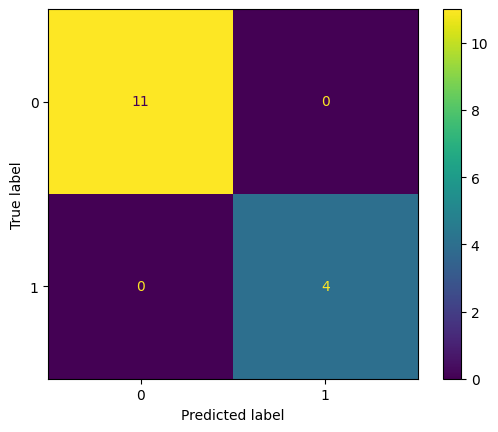

In [31]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [32]:

path = '/home/user/Desktop/HELMET AND NUMBER PLATE DETECTION/Helmet data/Helmet/data (6th copy).jpg'
img_array =imread(path)
img_resize = resize(img_array,(150,150,3)).flatten().reshape(1,-1)
y_pred = model.predict(img_resize)
if y_pred == 0:
    status = 'wear HELMET'
else:
    status = 'Not wearing HELMET'
prediction = []
prediction.append(status)
print(prediction)

['wear HELMET']


In [33]:
img = cv2.imread('/home/user/Desktop/HELMET AND NUMBER PLATE DETECTION/new.png')
cv2.imshow('dfd',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
text = pytesseract.image_to_string(img)
text
data = pytesseract.image_to_data(img,output_type=Output.DICT)
data.keys
n_boxes = len(data['text'])
n_boxes
data_pattern = '(KL\d{2}[a-zA-Z]{2}\d{4})'

In [35]:
for i in range(n_boxes):
    if data['conf'][i]>60:
        if re.match(data_pattern,data['text'][i]):
            x,y,w,h = data['left'][i],data['top'][i],data['width'][i],data['height'][i]

            img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
cv2.imshow('dfdf',img)
cv2.waitKey()
cv2.destroyAllWindows()

Vehicle_number = re.match(data_pattern,data['text'][i])

In [36]:
print("The vehicle number is ",Vehicle_number)
print("The person wear",status)

The vehicle number is  <re.Match object; span=(0, 10), match='KL55TD1224'>
The person wear wear HELMET
